Index(['ZIP Code', 'Week Number', 'Week Start', 'Week End', 'Cases - Weekly',
       'Cases - Cumulative', 'Case Rate - Weekly', 'Case Rate - Cumulative',
       'Tests - Weekly', 'Tests - Cumulative', 'Test Rate - Weekly',
       'Test Rate - Cumulative', 'Percent Tested Positive - Weekly',
       'Percent Tested Positive - Cumulative', 'Deaths - Weekly',
       'Deaths - Cumulative', 'Death Rate - Weekly', 'Death Rate - Cumulative',
       'Population', 'Row ID', 'ZIP Code Location'],
      dtype='object')
Missing Values:
 Cases - Weekly            223
Cases - Cumulative        223
Case Rate - Weekly        223
Case Rate - Cumulative    223
Tests - Weekly            392
ZIP Code Location         211
dtype: int64


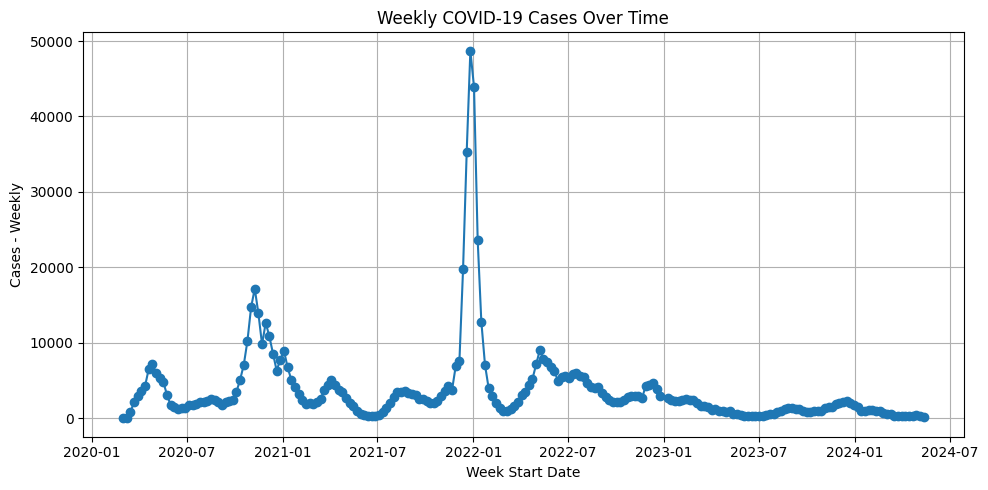

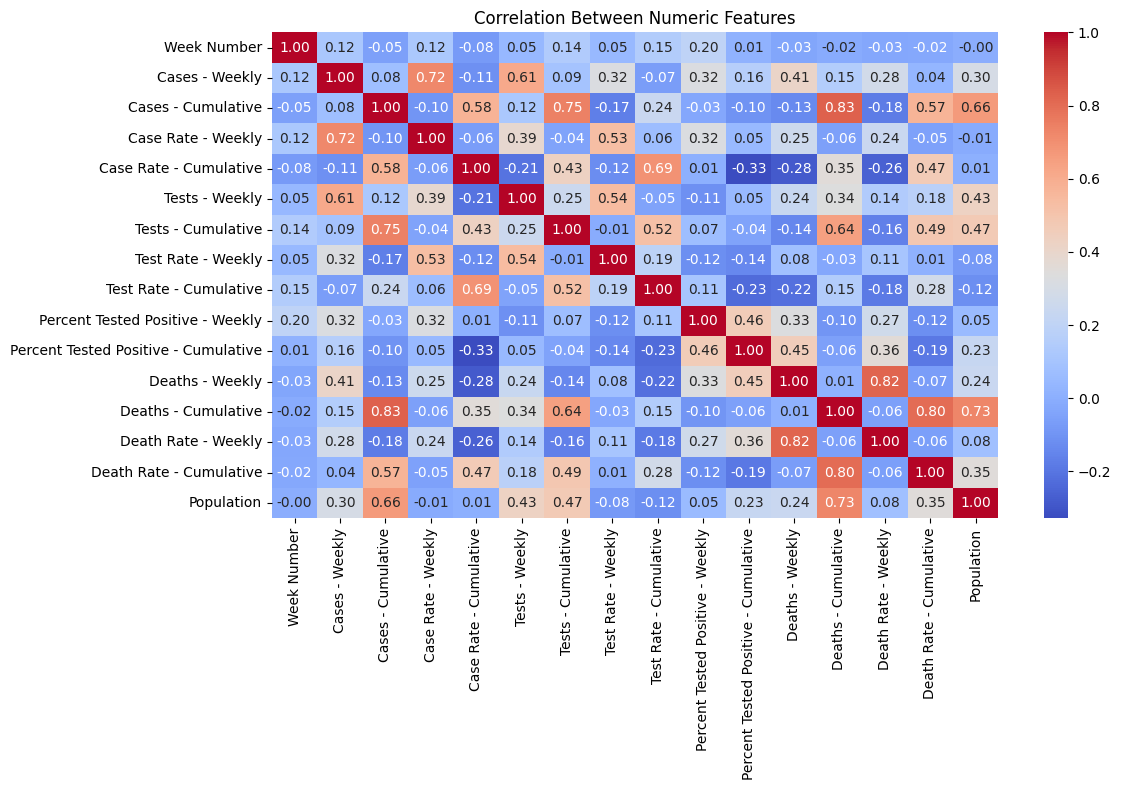

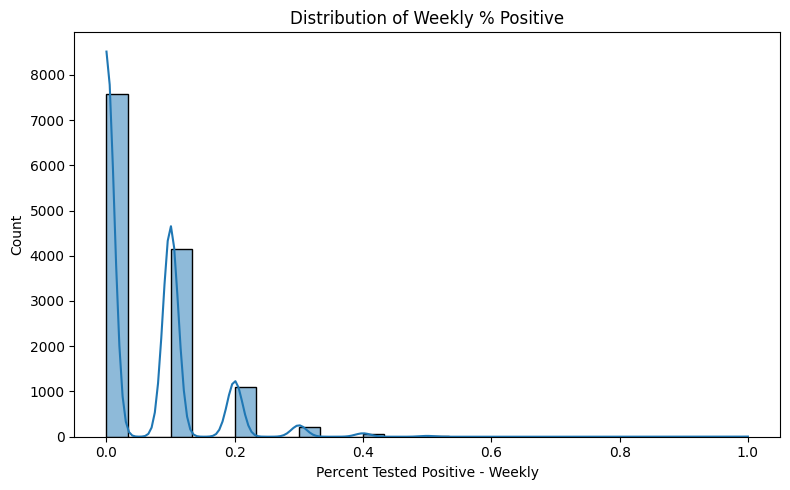

📈 MAE: 49.27
📊 R² Score: 0.37


In [5]:
# ✅ 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# ✅ 2. Load dataset
df = pd.read_csv('/content/COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code_-_Historical.csv')  # เปลี่ยน path ตามไฟล์จริงของบีม

# ✅ 3. ดูคอลัมน์ทั้งหมด
print(df.columns)

# ✅ 4. ตรวจสอบ missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

# ✅ 5. ลบข้อมูลที่ไม่จำเป็น
df.drop(columns=['Row ID', 'ZIP Code Location'], inplace=True)

# ✅ 6. แปลงวันที่ (ใช้ Week Start)
df['Week Start'] = pd.to_datetime(df['Week Start'])

# ✅ 7. สร้างกราฟแสดงแนวโน้มผู้ติดเชื้อรายสัปดาห์
plt.figure(figsize=(10,5))
cases_over_time = df.groupby('Week Start')['Cases - Weekly'].sum().reset_index()
plt.plot(cases_over_time['Week Start'], cases_over_time['Cases - Weekly'], marker='o')
plt.title("Weekly COVID-19 Cases Over Time")
plt.xlabel("Week Start Date")
plt.ylabel("Cases - Weekly")
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ 8. Heatmap ดูความสัมพันธ์ระหว่างตัวแปรหลัก
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()

# ✅ 9. Distribution กรณีศึกษา: % Positive
plt.figure(figsize=(8, 5))
sns.histplot(df['Percent Tested Positive - Weekly'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weekly % Positive')
plt.tight_layout()
plt.show()

# ✅ เตรียมข้อมูล ML + จัดการ missing
features = ['Tests - Weekly', 'Population']
target = 'Cases - Weekly'

# ลบแถวที่มีค่า NaN
df_ml = df[features + [target]].dropna()

X = df_ml[features]
y = df_ml[target]

# ✅ แบ่ง train-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ เทรนโมเดล
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ ทำนายและวัดผล
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📈 MAE: {mae:.2f}")
print(f"📊 R² Score: {r2:.2f}")

